In [1]:
!pip install face_recognition opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=d2d27b74121bf97692904932462456cf038cc3cc67d48e1588a1e578f2fafd99
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [9]:
import face_recognition
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
import pickle


known_face_encodings = []
known_face_names = []



try:
    with open('known_faces.pkl', 'rb') as f:
        known_face_encodings, known_face_names = pickle.load(f)
except FileNotFoundError:
    pass



def upload_and_add_known_face():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = face_recognition.load_image_file(filename)
        face_encoding = face_recognition.face_encodings(image)[0]
        name = input(f"Enter the name for the uploaded image ({filename}): ")
        known_face_encodings.append(face_encoding)
        known_face_names.append(name)


        with open('known_faces.pkl', 'wb') as f:
            pickle.dump((known_face_encodings, known_face_names), f)


In [ ]:
def upload_and_recognize_faces():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = face_recognition.load_image_file(filename)
        face_locations = face_recognition.face_locations(image)
        face_encodings = face_recognition.face_encodings(image, face_locations)

        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]
            cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

        cv2_imshow(image)

In [10]:
def upload_and_recognize_faces_in_video():
    uploaded = files.upload()
    for filename in uploaded.keys():
        video_capture = cv2.VideoCapture(filename)
        frame_number = 0
        while video_capture.isOpened():
            ret, frame = video_capture.read()
            if not ret:
                break


            rgb_frame = frame[:, :, ::-1]


            face_locations = face_recognition.face_locations(rgb_frame)
            face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)


            for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):

                matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
                name = "Unknown"

                face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
                best_match_index = np.argmin(face_distances)
                if matches[best_match_index]:
                    name = known_face_names[best_match_index]


                cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)


                cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
                font = cv2.FONT_HERSHEY_DUPLEX
                cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)


            cv2_imshow(frame)

            frame_number += 1

        video_capture.release()

In [6]:
upload_and_add_known_face()

Saving Elon Mask.jpg to Elon Mask (1).jpg


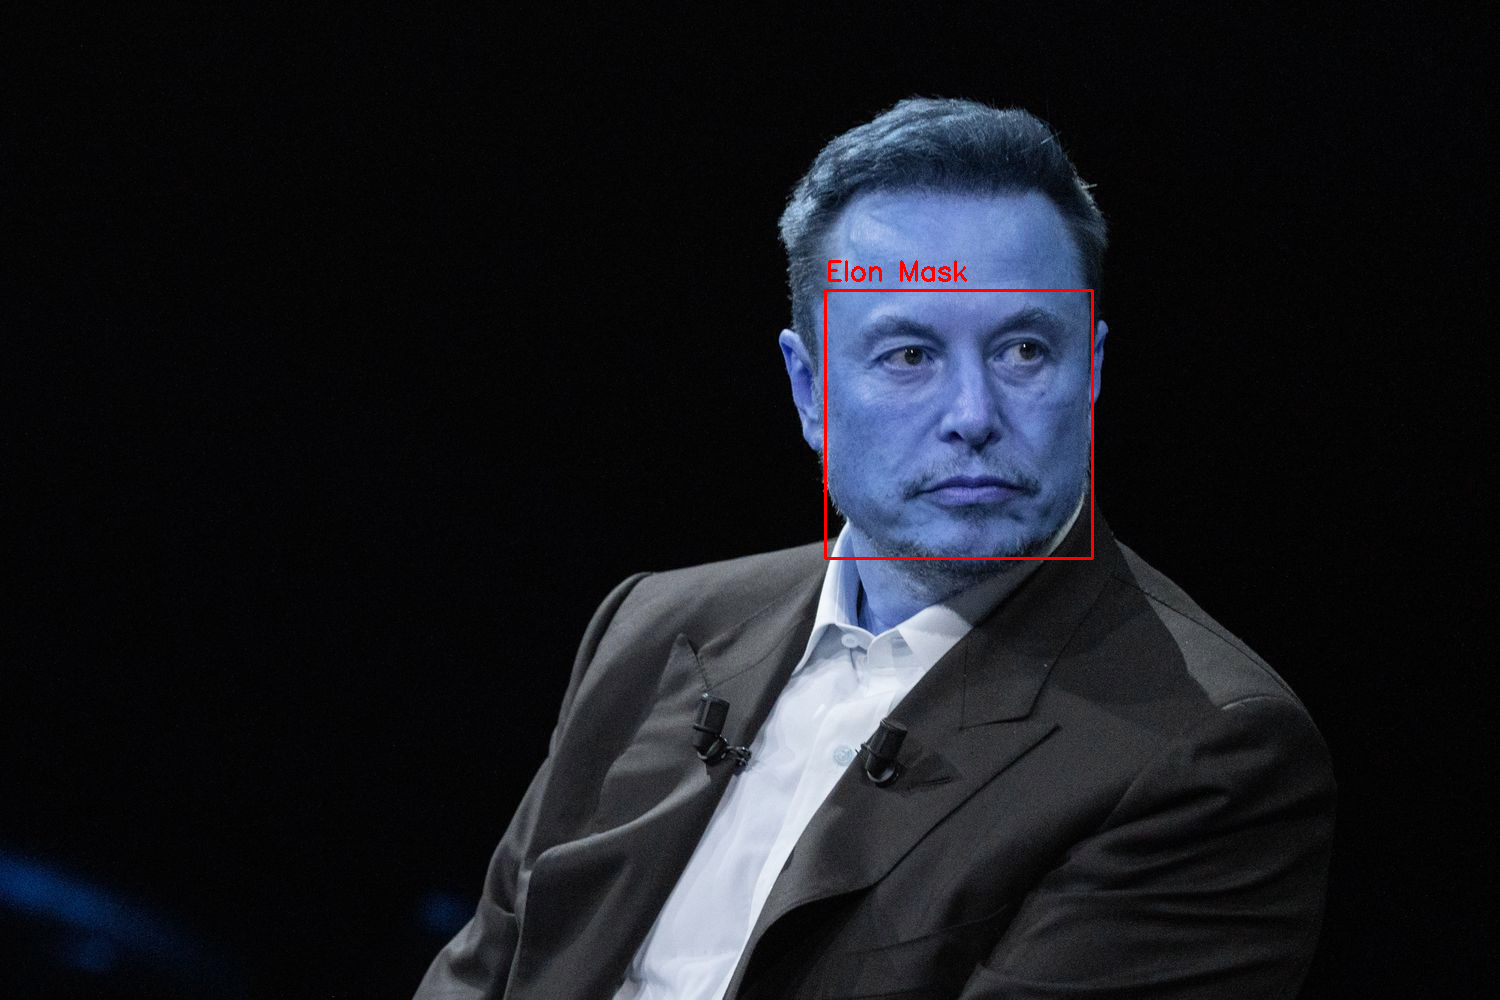

In [4]:
upload_and_recognize_faces()

In [10]:
upload_and_recognize_faces_in_video()

Saving videoplayback (1).mp4 to videoplayback (1) (3).mp4
